In [1]:
import pandas as pd
import dabest

In [2]:
iris = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/iris.csv")

In [19]:
iris_dabest = dabest.load(data = iris,x="species",y="petal_width",idx=("setosa","versicolor"))

In [97]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


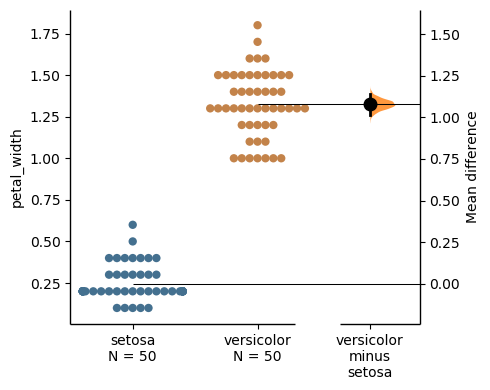

In [132]:
iris_dabest.mean_diff.plot(swarmplot_kwargs={'color':1});

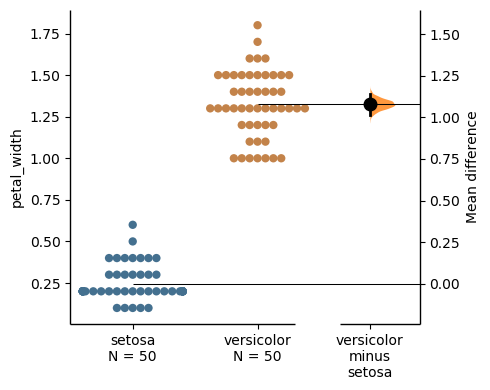

In [115]:
iris_dabest.mean_diff.plot(halfviolin_desat=1);

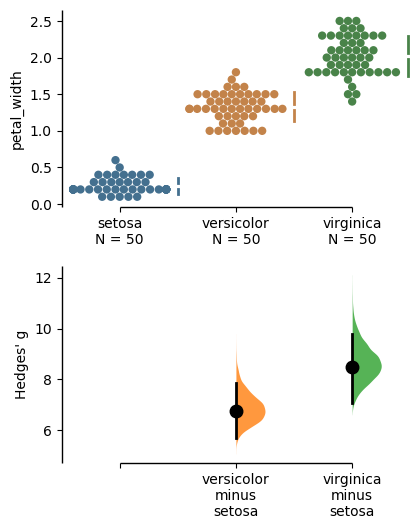

In [13]:
iris_dabest.hedges_g.plot();

In [21]:
files = dir("../deseq_yue/withRefSeq/shift15/coding/csv_raw/*.csv")

In [28]:
import glob
files = glob.glob("../deseq_yue/withRefSeq/shift15/coding/csv_raw/*.csv")
print(files)

['../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_L24_t0.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_L24_t1.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_L24_t2.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_S15_t0.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_S15_t1.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_S15_t2.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_S24_t0.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_S24_t1.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/ER_S24_t2.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/L24_against_S15_t0.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/L24_against_S15_t1.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/L24_against_S15_t2.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/RNA_T1_against_T0.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/RNA_T2_against_T0.csv', '../deseq_yue/withRefSeq/shift15/coding/csv_raw/RPF_T1_again

In [32]:
i=1
fileLabel = files[i].split("/")[-1][:-4]
fileLabel

'ER_L24_t1'

In [233]:
deseq_out = pd.read_csv(files[i])
type(deseq_out)
deseq_out[0:3]


,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,NM_017847,112.294090,-0.662837,0.273813,-2.420767,0.015488,0.120137
1,NM_001003803,182.333378,-0.132781,0.224270,-0.592060,0.553811,0.801922
2,NM_001003800,354.785989,0.072009,0.368656,0.195327,0.845137,0.946766


In [58]:
len(deseq_out)

7990

In [89]:
idxs = ['0']*100+['1']*7890

In [191]:
data = {'Group 0':deseq_out['log2FoldChange'][list(range(0,99))], 'Group 1':deseq_out['log2FoldChange'][list(range(100,7989))]}
df = pd.DataFrame(data) 
df.head()

,Group 0,Group 1
0,-0.662837,NaN
1,-0.132781,NaN
2,0.072009,NaN
3,-0.619136,NaN
4,0.746495,NaN


In [158]:
df_dabest = dabest.load(data = df,idx=("Group 1","Group 0"),paired=False,resamples=10000)

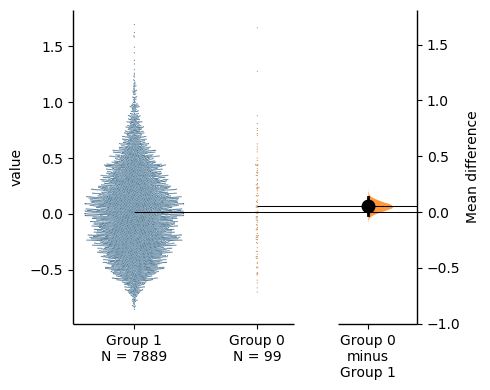

In [163]:
df_dabest.mean_diff.plot(swarmplot_kwargs={"size":0.8});

In [144]:
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import dabest

print("matplotlib v{}".format(mpl.__version__))
print("seaborn v{}".format(sns.__version__))
print("dabest v{}".format(dabest.__version__))

matplotlib v3.1.1
seaborn v0.9.0
dabest v0.2.7


In [160]:
df_dabest.mean_diff

DABEST v0.2.7
             
Good afternoon!
The current time is Wed Nov 13 17:38:25 2019.

The unpaired mean difference between Group 1 and Group 0 is 0.0521 [95%CI -0.0289, 0.138].
The two-sided p-value of the Mann-Whitney test is 0.289.

10000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [165]:
!pwd

/Users/zhaoy/Documents/HGLab/Untitled Folder


In [169]:
filteredGeneTable = pd.read_csv("filteredGenesDetails_human_240118.txt",sep='\t')
filteredGeneTable.head()

,GeneName,AccNum,Chrom,mRNALength,ORFLength,fpUTR_length,tpUTR_length,sumIntronLengths
0,UBE2Q1,NM_017582,chr1,3223,1269,91,1863,6847
1,DUOXA1,NM_001276267,chr15,3032,897,395,1740,9479
2,UBE2Q2,NM_173469,chr15,3098,1128,381,1589,54664
3,RNF10,NM_001330474,chr12,3861,2451,482,928,39404
4,RNF11,NM_014372,chr1,3074,465,484,2125,34101


In [177]:
Gene2Acc = {}
for idx,gene in filteredGeneTable.iterrows():
    Gene2Acc[gene['GeneName']] = gene['AccNum']
print(Gene2Acc['RNF10'])

NM_001330474


In [179]:
GeneGroup = pd.read_csv("../Gene Groups/Erythroid_29102019.csv")
GeneGroup.head()

,GeneSymbol,Name,Class,Function
0,ABCB6,NaN,NaN,Pishesha et al (Vijay & Lodish paper)
1,AHSP,Alpha-Hemoglobin-Stabilizing Protein,Heme Biosynthesis,stabilise free alpha-Hb
2,ALAD,aminolevulinate dehydratase,Heme Biosynthesis,NaN
3,ALAS2,Delta-aminolevulinate synthase 2,Heme Biosynthesis,NaN
4,ANK1,Ankyrin 1,Membrane protein,NaN


### Stupid Method

1. build dict based on gene list
2. loop thru deseq out file
    -> Give 'Group' label

In [231]:
AccSelected = {}
for idx,gene in GeneGroup.iterrows():
    if gene['GeneSymbol'] in Gene2Acc:
        AccSelected[Gene2Acc[gene['GeneSymbol']]] = "Erythroid"

In [234]:
Groups = []
for idx,gene in deseq_out.iterrows():
    if gene['Unnamed: 0'] in AccSelected:
        Groups.append("Erythroid")
    else:
        Groups.append('Others')

In [235]:
deseq_out.insert(1, "Group", Groups, True) 
deseq_out.head()

,Unnamed: 0,Group,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,NM_017847,Others,112.294090,-0.662837,0.273813,-2.420767,0.015488,0.120137
1,NM_001003803,Others,182.333378,-0.132781,0.224270,-0.592060,0.553811,0.801922
2,NM_001003800,Others,354.785989,0.072009,0.368656,0.195327,0.845137,0.946766
3,NM_016649,Others,208.700788,-0.619136,0.286961,-2.157560,0.030962,0.178877
4,NM_016647,Others,148.352948,0.746495,0.615334,1.213155,0.225071,0.518246


In [237]:
sum(dat["Group"] == "Erythroid")

64

In [238]:
data = {'Others':deseq_out['log2FoldChange'][deseq_out['Group']=="Others"], 'Erythroid':deseq_out['log2FoldChange'][deseq_out['Group']=='Erythroid']}
df = pd.DataFrame(data) 
df.head()

,Others,Erythroid
0,-0.662837,NaN
1,-0.132781,NaN
2,0.072009,NaN
3,-0.619136,NaN
4,0.746495,NaN


In [239]:
df_dabest = dabest.load(data = df,idx=("Others","Erythroid"),paired=False,resamples=10000)

/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:244: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be r

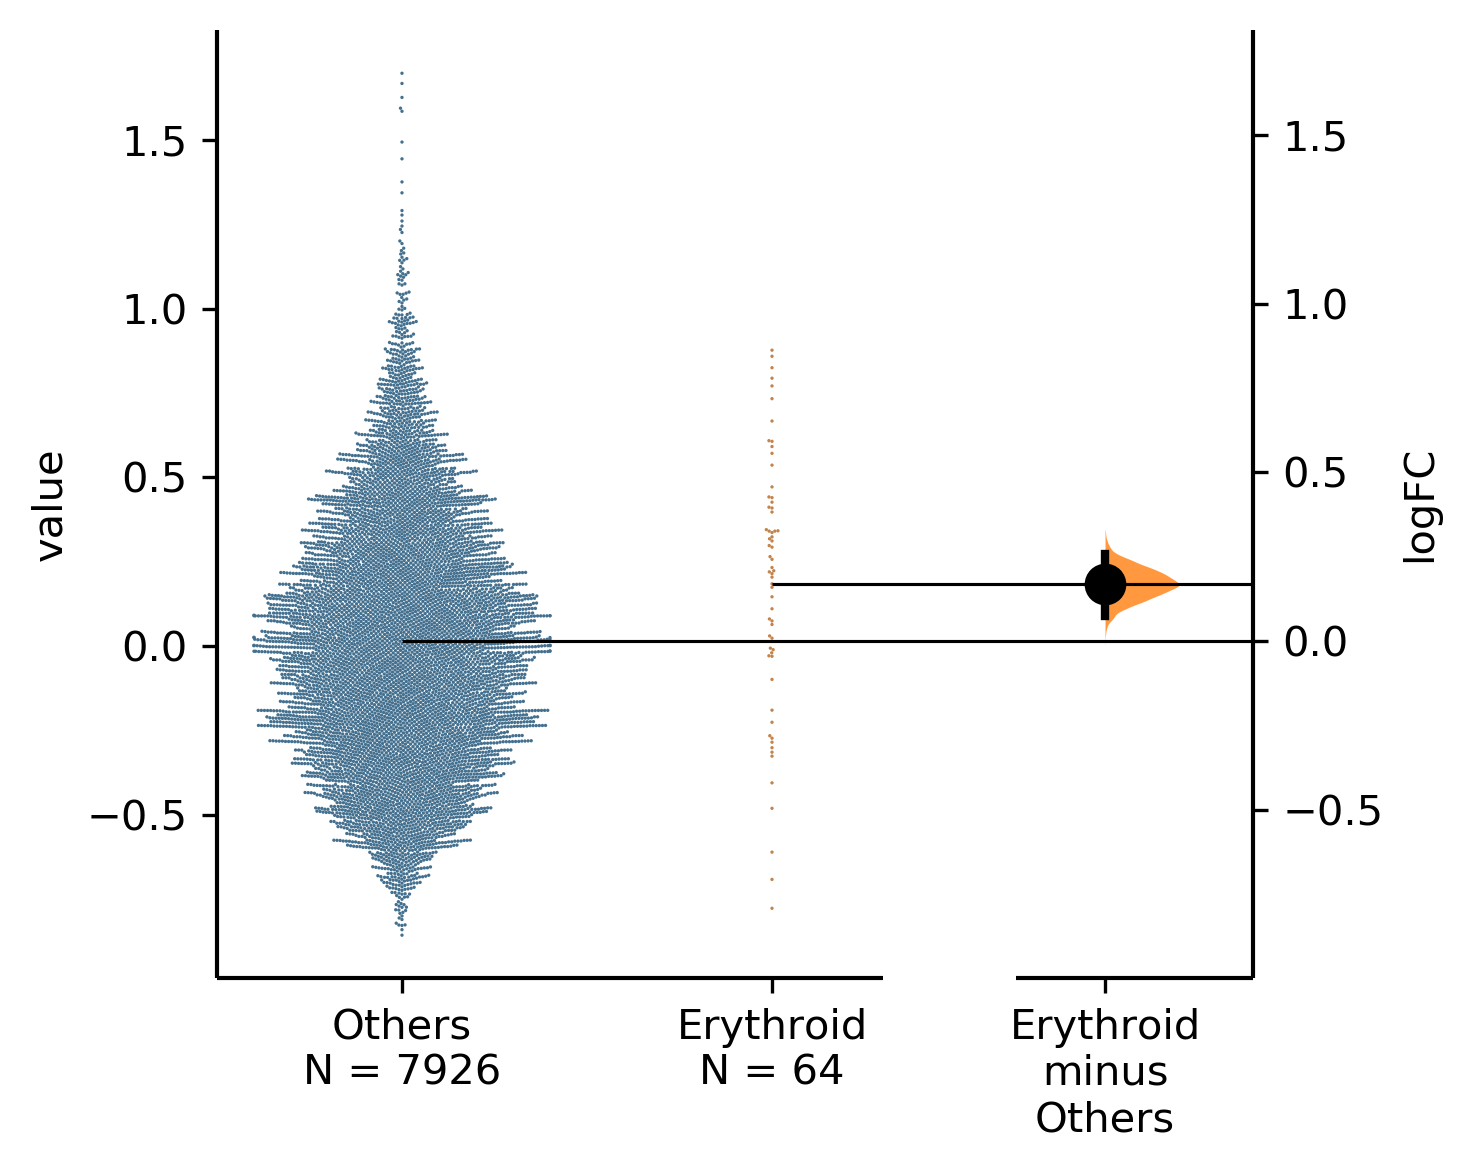

In [249]:
plt=df_dabest.mean_diff.plot(swarmplot_kwargs={"size":0.8},contrast_label="logFC",dpi=300);

AttributeError: 'Figure' object has no attribute 'contrast_label'

In [246]:
plt.savefig('test.png',dpi=300)